# Исследование объявлений о продаже квартир

**Цель исследования**

Научиться определять рыночную стоимость объектов недвижимости. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

В вашем распоряжении данные сервиса Яндекс. Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Изучение данных из файла

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
# Приведём названия столбца 'cityCenters_nearest' к змеинному языку
df = df.rename(columns={'cityCenters_nearest':'city_centers_nearest'})
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Вывод

Первичный анализ данных показал, что в таблице с данными имеются следующие проблемы:
- Пропуски в колонках 'ceiling_height', 'floors_total', 'living_area', 'is_apartment', 'kitchen_area', 'balcony', 'locality_name', 'airports_nearest', 'city_centers_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition';
- Проблемы с типами данных: 'first_day_exposition' тип 'object' необходимо преобразовать в тип 'datatime'.
- 'last_price', 'days_exposition', 'floors_total', 'balcony', 'airports_nearest', 'cityCenters_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest'  имеют тип 'float', однако по смыслу данных и удобству анализа преобразуем их в 'integer'.
- Вызывают вопросы данные в колонке 'rooms'. Как может количество комнат быть равным нулю?
- Вызывают вопросы данные в колонке 'ceiling_height'. Высота потолков 1 метр? А 100 метров?
- 'airports_nearest'. Расстояние до аэропорта 0 метров. Удобно жить на взлётной полосе?



## Предобработка данных

### Обработка пропусков

Исправление проблемм, выявленных на этапе первичного анализа данных, будем производить следующим образом:
- 'balcony' - если не указано количество балконов, значит их в квартире нет. Заменим пропуски нулями.
- 'is_apartment' - скорее всего, если в этом столбце пропуск, то ланная квартира не апартаменты. Прежде чем заменять пропуски на False, необходимо более внимательно оценить данные.
- Пропуски в колонках 'ceiling_height' - В данной колонке, наиболее оптимальным вариантом будет замена пропусков на медианное значение высоты потолка. Посмотрим внимательнее на данные и примем решение. 
- 'living_area' и 'kitchen_area' - Можно попытаться расчитать эти значения из общей площади квартиры, но нет уверенности что этот расчёт будет точным и это будет полезно в дальнейшем анализе. 
- 'airports_nearest', 'city_centers_nearest', 'parks_nearest', 'ponds_nearest' - Информация о расстоянии до объектов не указана. Это может означать, что данных объектов поблизости нет, либо информация о них не указана. Эту информацию, теоретически, можно взять проанализировав названия населённого пункта. Необходим дополнительный анализ для принятия решения о замене пропксков.
- 'parks_around3000' и 'ponds_around3000' - Если ponds_nearest или parks_nearest = NaN, тогда количество водоёмов или парков поблизости = 0. Но нам не известна причина NaN в ponds_nearest и parks_nearest по причинам указанным в пункте выше. Поэтому оставим пропуски и в этих колонках.
- 'days_exposition', 'floors_total', 'locality_name'- Данная информация не указана и восстановить её неоткуда.

In [5]:
#Замена пропусков в колонке 'balcony' нулями
df['balcony'] = df['balcony'].fillna(0)

#Анализ колонки 'is_apartment'
print(df['is_apartment'].value_counts())
df[df['is_apartment'] == True].head(10)

False    2725
True       50
Name: is_apartment, dtype: int64


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
543,11,12790000.0,56.6,2018-11-06T00:00:00,2,3.50,3.0,29.40,1,True,...,NaN,0.0,Петергоф,35248.0,30437.0,3.0,53.0,3.0,22.0,NaN
916,11,8183000.0,70.0,2018-01-11T00:00:00,2,3.12,3.0,40.00,3,True,...,NaN,2.0,Санкт-Петербург,45796.0,21729.0,0.0,NaN,1.0,754.0,179.0
1109,1,34878556.0,95.8,2014-12-09T00:00:00,2,NaN,6.0,58.30,5,True,...,20.00,1.0,Санкт-Петербург,21860.0,318.0,2.0,160.0,3.0,569.0,1572.0
1608,12,2150000.0,20.1,2019-01-30T00:00:00,1,NaN,9.0,NaN,1,True,...,NaN,0.0,Санкт-Петербург,26646.0,12147.0,0.0,NaN,0.0,NaN,13.0
2759,11,7500000.0,152.0,2018-07-27T00:00:00,3,3.00,3.0,NaN,1,True,...,NaN,1.0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,7.0
2975,9,4931398.0,42.9,2018-07-23T00:00:00,1,3.15,4.0,20.39,3,True,...,10.29,0.0,Санкт-Петербург,44870.0,20802.0,0.0,NaN,1.0,792.0,273.0
3067,13,6600000.0,95.0,2018-09-08T00:00:00,2,4.50,7.0,45.00,7,True,...,25.00,2.0,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,96.0
3816,4,4779000.0,53.1,2016-05-16T00:00:00,1,NaN,13.0,19.80,6,True,...,15.90,2.0,Санкт-Петербург,19396.0,4516.0,0.0,NaN,1.0,826.0,60.0
3951,10,4300000.0,50.0,2019-04-20T00:00:00,1,3.00,11.0,17.00,9,True,...,12.00,2.0,Санкт-Петербург,10143.0,11367.0,0.0,NaN,0.0,NaN,NaN
4339,19,6900000.0,72.0,2019-03-25T00:00:00,3,3.50,4.0,70.00,1,True,...,NaN,0.0,Санкт-Петербург,31487.0,4466.0,2.0,353.0,1.0,439.0,22.0


Из имеемых данных в колонке 'is_apartment', всего 50 апартаментов против 2725 обычных квартир. Сделать вывод о том, что все остальные 20000 квартир не апартаменты, исходя из имеемых данных, не представляется возможным. Оставим пропуски без изменений.

Медианная высота потолков: 2.65


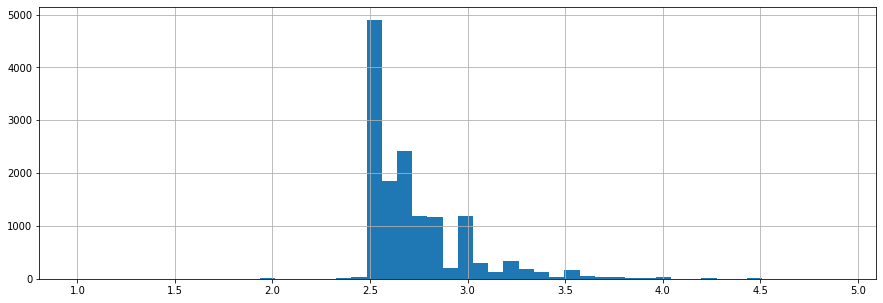

In [6]:
#Анализ высоты потолков
print('Медианная высота потолков:', df['ceiling_height'].median())
df[df['ceiling_height'] < 5]['ceiling_height'].hist(bins=50, figsize=(15,5));

Если заменить пропуски медианой, то мы получим пик из 10000 значений на 2,65 метров. Но так как разброс достоверных значений очень мал(2,5 - 3 метра), то таким действием мы исказим данные и навредим дальнейшему исследованию. Лучше оставить пропуски как есть.

Проанализируем данные в колонках 'airports_nearest' и 'cityCenters_nearest' и их зависимость от населнного пункта 'locality_name'

In [7]:
#Сводные таблицы по городам и расстояниям до аэропорта и центра города
display(df.pivot_table(index='locality_name', values='airports_nearest', aggfunc=['min','median','max']))
df.pivot_table(index='locality_name', values='city_centers_nearest', aggfunc=['min','median','max'])

,min,median,max
,airports_nearest,airports_nearest,airports_nearest
locality_name,,,
Зеленогорск,70016.0,72282.0,81607.0
Колпино,23649.0,26232.0,31691.0
Красное Село,23892.0,25715.5,38367.0
Кронштадт,64931.0,67850.0,69785.0
Ломоносов,46502.0,48415.5,56896.0
Павловск,19380.0,20529.5,24291.0
Петергоф,34626.0,39231.0,46535.0
Пушкин,12157.0,15766.0,21055.0


,min,median,max
,city_centers_nearest,city_centers_nearest,city_centers_nearest
locality_name,,,
Зеленогорск,51115.0,53381.0,62706.0
Колпино,29436.0,32018.0,37477.0
Красное Село,27317.0,29140.5,41792.0
Кронштадт,46657.0,49575.0,51511.0
Ломоносов,36816.0,51677.0,61495.0
Павловск,31533.0,32683.0,36445.0
Петергоф,29815.0,33771.0,49574.0
Пушкин,24311.0,27930.5,35610.0


Из сводных таблиц видно, что данные по расстоянию до аэропорта и до центра города для каждого населнного пункта имеют не большую разницу. Только для города Санкт-Петербург, в силу своего размера, разброс значений очень существенный. Думаю, допустимо для всех населнных пунктов кроме Санкт-Петербурга, заменить пропуски в колонках 'airports_nearest' и 'city_centers_nearest' на медианы для соответствующих городов.

In [8]:
# Функция возвращает медианное значение расстояний до аэропорта по названию населённого пункта
def airport_replace(locality):
    try:
        return df_airport_nearest['airports_nearest'][locality]
    except:
        return np.nan
# Функция возвращает медианное значение расстояний до центра города по названию населённого пункта
def city_сenters_replace(locality):
    try:
        return df_city_сenters['city_centers_nearest'][locality]
    except:
        return np.nan
# Формируем список медианных значений расстояний до аэропорта для каждого населённого пункта кроме СпБ
df_airport_nearest = df[df['locality_name'] != 'Санкт-Петербург'].pivot_table(index='locality_name', 
                                                                             values='airports_nearest', 
                                                                             aggfunc='median')
# Формируем список медианных значений расстояний до центра города для каждого населённого пункта кроме СпБ
df_city_сenters = df[df['locality_name'] != 'Санкт-Петербург'].pivot_table(index='locality_name', 
                                                                             values='city_centers_nearest', 
                                                                             aggfunc='median')
# Заполняем пропуски 
df.loc[df['airports_nearest'].isna(), 'airports_nearest'] = df[df['airports_nearest'].isna()]['locality_name'].apply(airport_replace)
df.loc[df['city_centers_nearest'].isna(), 'city_centers_nearest'] = df[df['city_centers_nearest'].isna()]['locality_name'].apply(city_сenters_replace)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Далеко не от всех пропусков в данных колонках удалось избавится. Но это лучше чем оставить всё как есть.
Далее, оценим данные в колонках 'parks_nearest', 'parks_around3000', 'ponds_nearest','ponds_around3000'.

In [9]:
display(df.pivot_table(index='locality_name', values=['parks_nearest','parks_around3000'], aggfunc=['min','median','max']).head())
df.pivot_table(index='locality_name', values=['ponds_nearest','ponds_around3000'], aggfunc=['min','median','max']).head()


min                         median                \
              parks_around3000 parks_nearest parks_around3000 parks_nearest   
locality_name                                                                 
Зеленогорск                0.0           4.0              3.0         147.5   
Колпино                    0.0          49.0              0.0         393.0   
Красное Село               0.0          23.0              0.0         428.5   
Кронштадт                  0.0           9.0              2.0         293.0   
Ломоносов                  0.0          17.0              0.0         407.0   

                           max                
              parks_around3000 parks_nearest  
locality_name                                 
Зеленогорск                3.0         574.0  
Колпино                    3.0        2131.0  
Красное Село               3.0         951.0  
Кронштадт                  3.0         639.0  
Ломоносов                  3.0         580.0

min                         median                \
              ponds_around3000 ponds_nearest ponds_around3000 ponds_nearest   
locality_name                                                                 
Зеленогорск                0.0          55.0              1.0         507.0   
Колпино                    0.0          44.0              1.0         509.0   
Красное Село               0.0         132.0              0.0         225.5   
Кронштадт                  0.0          60.0              2.0         312.0   
Ломоносов                  0.0         110.0              1.0         553.0   

                           max                
              ponds_around3000 ponds_nearest  
locality_name                                 
Зеленогорск                2.0        1037.0  
Колпино                    3.0        1140.0  
Красное Село               2.0        1009.0  
Кронштадт                  3.0        1110.0  
Ломоносов                  3.0        1038.0

В этих колонках разброс значений для каждого населённого пункта очень большой. Поэтому восстановить данные способом как для расстояний до аэропорта и центра города не получится.

**Вывод**

Заполнены пропуски:
- 'balcony' - Заполнены нулями. Исходя из соображений, что если не указано количество балконов, значит их в квартире нет. 
- 'airports_nearest', 'city_centers_nearest',  - Где это возможно, произвели замену на медианное значение расстояний для каждого населённого пункта.
- 'is_apartment', 'ceiling_height', 'parks_nearest', 'ponds_nearest', 'parks_around3000' и 'ponds_around3000'- Проведя анализ, от заполнения пропусков в данных колонках решено отказаться. 

Не так много  пропусков как хотелось-бы удалось заполнить. Однако, в дальнейшем анализе, отсутствие значений будем стараться использовать как информацию.

### Замена типа данных

Необходимо разобраться со следёющими проблемами в типах данных:
- 'first_day_exposition' тип 'object' необходимо преобразовать в тип 'datatime'.
- 'last_price', 'days_exposition', 'floors_total', 'balcony', 'airports_nearest', 'cityCenters_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', имеют тип 'float', однако по смыслу данных и удобству анализа? их необходимо преобразовать в 'integer'.

In [10]:
#преобразование 'first_day_exposition' из string в datetime. Нас интересует только дата.
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'])
#преобразование из float64 в integer
df['last_price'] = df['last_price'].astype('int64', errors='ignore')
df['balcony'] = df['balcony'].astype('int64', errors='ignore')
df['floors_total'] = df['floors_total'].astype('int64', errors='ignore')
df['airports_nearest'] = df['airports_nearest'].astype('int64', errors='ignore')
df['city_centers_nearest'] = df['city_centers_nearest'].astype('int64', errors='ignore')
df['parks_around3000'] = df['parks_around3000'].astype('int64', errors='ignore')
df['parks_nearest'] = df['parks_nearest'].astype('int64', errors='ignore')
df['ponds_around3000'] = df['ponds_around3000'].astype('int64', errors='ignore')
df['ponds_nearest'] = df['ponds_nearest'].astype('int64', errors='ignore')
df['days_exposition'] = df['days_exposition'].astype('int64', errors='ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

**Вывод**

Произвели преобразование типов:
- 'first_day_exposition' из string в datetime.
- 'last_price', 'days_exposition', 'floors_total', 'balcony', 'airports_nearest', 'cityCenters_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest' из float64 в int64.

Замена типа данных повысит наглядность данных и ускорит обработку.

### Вывод

В ходе предобработки данных удалось избавиться от части пропусков, произведено преобразование типов даннных. Данные действия позволят упростить дальнейший анализ и повысят наглядность и восприятие данных.

## Расчёты и добавление результатов в таблицу

Для дальнейшего анализа необходимо произвести расчёты:
- цена квадратного метра;
- день недели, месяц и год публикации объявления;
- тип этаж квартиры - первый, последний, другой;
- соотношение жилой и общей площади;
- соотношение площади кухни и общей площади.

In [11]:
# Функция возвращает тип этажа
def floor_type_select(row):
    if row['floor'] == 1:
        return 'first'
    elif row['floor'] == row['floors_total']:
        return 'last'
    else:
        return 'other'
    
# Цена квадратного метра = last_price / total_area
df['price_square_meter'] = df['last_price'] / df['total_area']

# День недели, месяц и год публикации объявления
df['weekday_exposition'] = df['first_day_exposition'].dt.weekday
df['month__exposition']  = df['first_day_exposition'].dt.month
df['year__exposition']   = df['first_day_exposition'].dt.year

# этаж квартиры; варианты — первый, последний, другой
df['floor_type'] = df.apply(floor_type_select, axis=1)

# Соотношение жилой и общей площади и отношение площади кухни к общей
df['living_total_area_ratio']  = df['living_area' ] / df['total_area']
df['kitchen_total_area_ratio'] = df['kitchen_area'] / df['total_area'] 
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,weekday_exposition,month__exposition,year__exposition,floor_type,living_total_area_ratio,kitchen_total_area_ratio
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,2.0,755.0,NaN,120370.370370,3,3,2019,other,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,0.0,NaN,81.0,82920.792079,1,12,2018,first,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,2.0,574.0,558.0,92785.714286,3,8,2015,other,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,3.0,234.0,424.0,408176.100629,4,7,2015,other,NaN,NaN
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,1.0,48.0,121.0,100000.000000,1,6,2018,other,0.320000,0.410000


**Вывод**

Необходимые показатели расчитаны и добавлены в датафрейм.

## Исследовательский анализ данных

Этапы исследовательского анализа данных:
- Изучение следующих параметров: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра.
- Изучение времени продажи квартиры. Построим гистограмму. Посчитаем среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
- Уберём редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.
- Изучение факторов больше всего влияющих на стоимость квартиры.
- Изучение предложений квартир.
- Изучение предложений квартир в центре Санкт-Петербурга.
- Анализ квартир в центре Санкт-Петербурга.

### Изучение площади, цены, числа комнат, высоты потолков.

Построим гистограммы для каждого параметра.

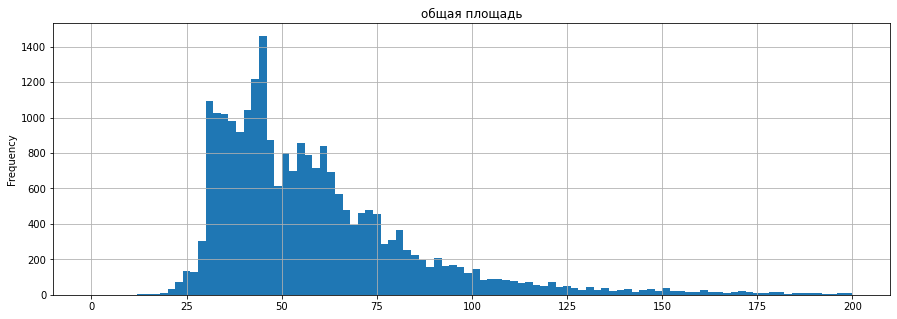

Самая маленькая квартира 12.0 кв.м.
Самая большая квартира 900.0 кв.м.


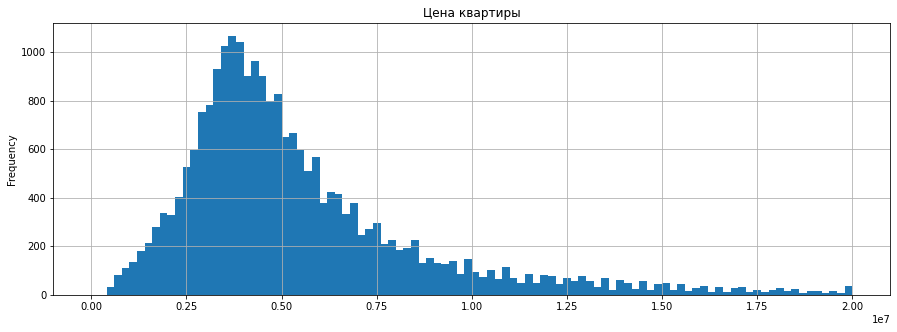

Самая дешевая квартира 12190 р.
Самая дорогая квартира 763000000 р.


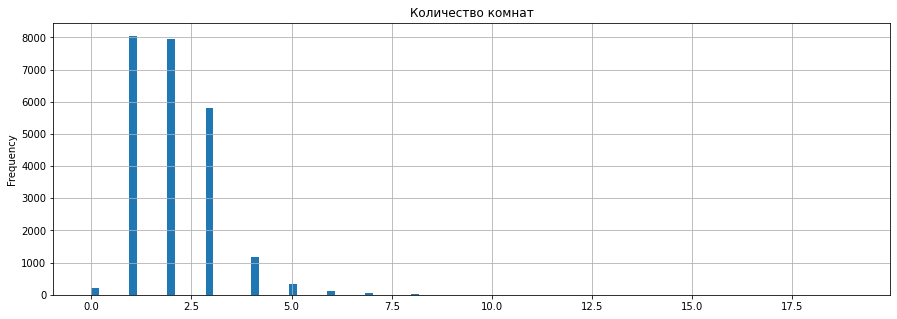

Меньше всего комнат 0
Больше всего комнат 19


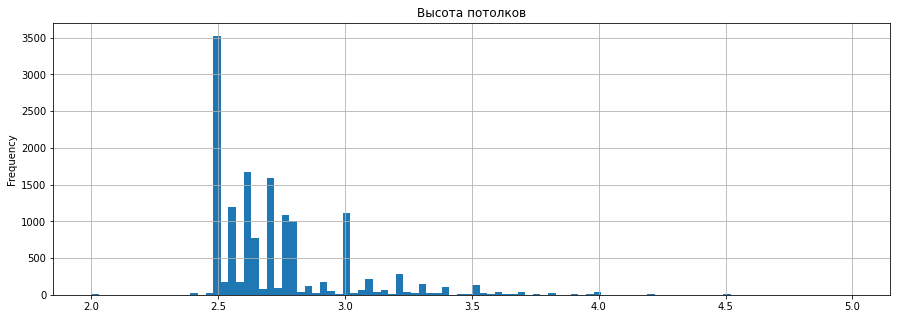

Самая низкая квартира 1.0 м
Самая высокая квартира 100.0 м


In [12]:
# Анализ площади квартир
df['total_area'].plot(kind='hist', range=(0, 200), bins=100, figsize=(15,5), grid=True, title='общая площадь')
plt.show()
print('Самая маленькая квартира', df['total_area'].min(), 'кв.м.')
print('Самая большая квартира', df['total_area'].max(), 'кв.м.')

# Анализ цены продажи квартир
df['last_price'].plot(kind='hist', range=(0, 20000000), bins=100, figsize=(15,5), grid=True, title='Цена квартиры')
plt.show()
print('Самая дешевая квартира', df['last_price'].min(), 'р.')
print('Самая дорогая квартира', df['last_price'].max(), 'р.')

# Анализ количества комнат
df['rooms'].plot(kind='hist', bins=100, figsize=(15,5), grid=True, title='Количество комнат')
plt.show()
print('Меньше всего комнат', df['rooms'].min())
print('Больше всего комнат', df['rooms'].max())
# Анализ высоты потолков
df['ceiling_height'].plot(kind='hist', bins=100, range=(2,5), figsize=(15,5), grid=True, title='Высота потолков')
plt.show()
print('Самая низкая квартира', df['ceiling_height'].min(), 'м')
print('Самая высокая квартира', df['ceiling_height'].max(), 'м')


**Вывод**

- Площади большинства продаваемых квартир находятся в диапозоне от 25 до 100 кв.м. Самые часто продаваемые квартиры имеют площадь от 35 до 45 кв.м. Есть и уникальные случаи:12 и 900 кв.м.
- Цена большинства продаваемых квартир находятся в диапозоне от 2,5 до 7,5 млн.руб. Самые часто продаваемые квартиры стоят от до 3 до 5 млн.руб. Самая дешевая квартира 12190 р. Самая дорогая 763 млн.р.
- Число комнат большинства продаваемых квартир находятся в диапозоне от 1 до 3. Самые популярные 1 и 2-х комнатные. Встречаются ноль комнатные квартиры. Скорее всего это студии. Самая большая проданная квартира имеет 19 комнат.
- Высота потолков большинства продаваемых квартир находятся в диапозоне от 2,5 до 3 метров. Однако за пределами этого диапозона есть явные аномалии. В дальнейшем нужно будет с ними разобраться.

### Изучение времени продажи квартиры.

Этапы изучения:
- Построим гистограмму.
- Посчитаем среднее и медиану. 
- Оценим, сколько обычно занимает продажа. 
- Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

In [13]:
# Функция возвращает нижние и верхние усы диаграмы размаха 
def moustache(col):
    descr = col.describe()
    irq = (descr['75%'] - descr['25%']) * 1.5
    minimum = max(descr['25%'] - irq , descr['min'])
    maximum = min(descr['75%'] + irq, descr['max'])
    return minimum, maximum

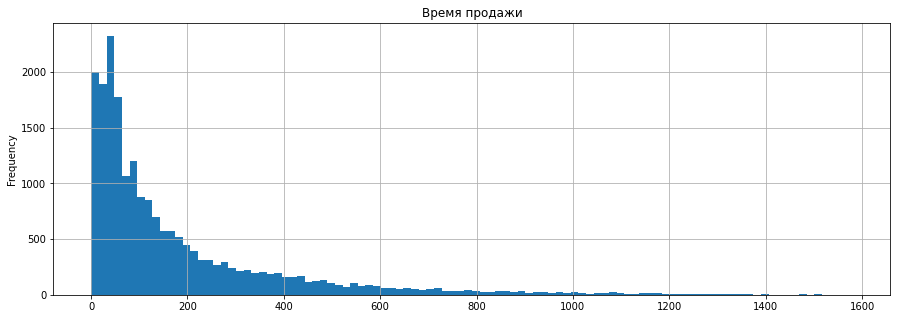

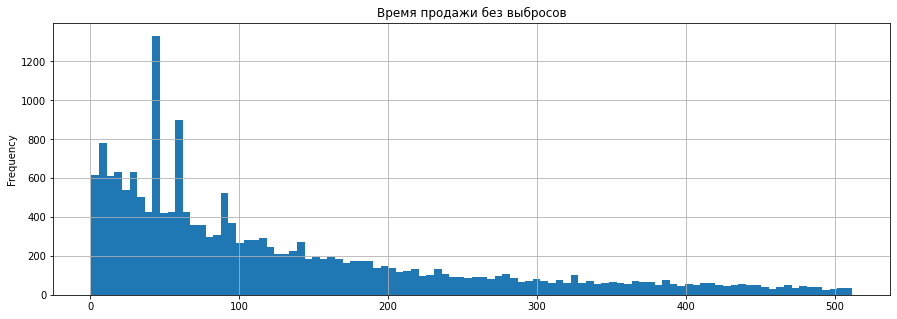

Среднее время продажи: 180 , без выбросов: 128
Медианное время продажи: 95.0 , без выбросов: 85.0


In [14]:
# Выделим в отдельную таблицу квартиры без аномалий во времени продажи с помощью усов диаграмы размаха
min_mus, max_mus = moustache(df['days_exposition'])
df_good_days_exp = df[df['days_exposition'] <= max_mus]
# Гистограмма времени продажи
df['days_exposition'].plot(kind   ='hist', 
                           bins   =100, 
                           figsize=(15,5), 
                           grid   =True, 
                           title  ='Время продажи')
plt.show()
# Гистограмма времени продажи без выбросов
df_good_days_exp['days_exposition'].plot(kind   ='hist', 
                                         bins   =100, 
                                         figsize=(15,5), 
                                         grid   =True, 
                                         title  ='Время продажи без выбросов')
plt.show()

print('Среднее время продажи:', int(df['days_exposition'].mean()), 
      ', без выбросов:', int(df_good_days_exp['days_exposition'].mean()))
print('Медианное время продажи:', df['days_exposition'].median(), 
      ', без выбросов:', df_good_days_exp['days_exposition'].median())



**Вывод**

Медианное время продажи квартиры составило 85 дней. Среднее время продажи составило 128 дней.
Продажи до 40 дней можно считать необычно быстрыми. Реже продажи длятся до 512 дней. Продажи более 512 дней считаются аномально долгими. 

### Редкие и выбивающиеся значения.

В ходе анализа данных были обнаруженны следующие особенности:
- Площадь квартир. Минимальная площадь составила 12 кв.м, а максимальная 900 кв.м. Это необычно, но допустимо.
- Цена квартир. Самая дешевая квартира 12190 р. Самая дорогая квартира 763000000 р. Если самая дорогая квартира вполне может иметь такую цену, то самая дешевая явно выходит за пределы разумного.
- Количество комнат. Есть ряд квартир, для которых указано количество комнат = 0. Допустим, что это квартиры - студии. Есть, также квартира с 19 комнатами. Это конечно, не обычно, но тоже вполне может быть.
- Высота потолков. В таблице присутствуют квартиры с высотой потолков 1м и 100м. Необходимо устранить эту проблему.
- 'airports_nearest'. Расстояние до аэропорта 0 метров. Удобно жить на взлётной полосе?


#### Площадь квартир.

С помощью предварительно созданой функции moustache, определеим минимальную и максимальную границу репрезентативного диапозона площади квартир. Квартиры не входящие в данный диапозон исключим из дальнейшего анализа.

In [15]:
# Обрезка по усам диаграмы размаха
min_mus, max_mus = moustache(df['total_area'])
print('Диапозон площадей квартир:', min_mus, '-', max_mus+20)
df = df[(df['total_area'] < max_mus+20) & (df['total_area'] > min_mus)]

Диапозон площадей квартир: 12.0 - 134.75


#### Цена квартир.

Также как для площади квартир, определеим минимальную и максимальную границу репрезентативного диапозона цен на квартиры. Квартиры не входящие в данный диапозон исключим из дальнейшего анализа. Но сначала посмотрим внимательнее на дешевые квартиры.

In [16]:
# Дешевые квартиры 
df[df['last_price'] < 1000000].sort_values(by='last_price').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,weekday_exposition,month__exposition,year__exposition,floor_type,living_total_area_ratio,kitchen_total_area_ratio
8793,7,12190,109.0,2019-03-20,2,2.75,25.0,32.0,25,NaN,...,0.0,NaN,8.0,111.834862,2,3,2019,last,0.293578,0.371560
14911,5,430000,54.0,2018-06-26,2,NaN,3.0,NaN,3,NaN,...,NaN,NaN,44.0,7962.962963,1,6,2018,last,NaN,NaN
17456,7,430000,30.4,2019-04-22,1,NaN,2.0,16.0,1,NaN,...,NaN,NaN,NaN,14144.736842,0,4,2019,first,0.526316,0.197368
16274,18,440000,40.0,2018-07-10,1,NaN,5.0,NaN,1,NaN,...,NaN,NaN,45.0,11000.000000,1,7,2018,first,NaN,NaN
9581,7,450000,43.4,2018-08-31,2,NaN,5.0,30.3,3,NaN,...,NaN,NaN,96.0,10368.663594,4,8,2018,other,0.698157,0.126728


Квартиры стоимостью до 1 миллиона рублей вызывают вопросы, но, всётаки, реальны для каких нибудь окраин Ленобласти. Но цена 12190 за квартиру 109 кв.м в Санкт-Петербурге - это явно ошибка в порядке цен. Видимо, нужно добавить три нуля. 

In [17]:
# Переоценка в 1000 раз
df.loc[df['last_price'] == 12190, 'last_price'] *= 1000

In [18]:
# Обрезка по усам диаграмы размаха
min_mus, max_mus = moustache(df['last_price'])
print('Диапозон цен квартир:', min_mus, '-', max_mus+1000000)
df = df[(df['last_price'] < max_mus+1000000) & (df['last_price'] > min_mus)]

Диапозон цен квартир: 430000.0 - 12150000.0


#### Количество комнат.

Аналогичным образом, определеим минимальную и максимальную границу репрезентативного диапозона количества комнат. Квартиры не входящие в данный диапозон исключим из дальнейшего анализа.

In [19]:
# Обрезка по усам диаграмы размаха
min_mus, max_mus = moustache(df['rooms'])
print('Диапозон количества комнат:', min_mus, '-', max_mus)
df = df[(df['rooms'] < max_mus) & (df['rooms'] > min_mus)]

Диапозон количества комнат: 0.0 - 6.0


#### Высота потолков.

Также, определеим минимальную и максимальную границу репрезентативного диапозона высоты потолков. Однако, чтобы не удалять слишком много данных, квартиры не входящие в данный диапозон исключать не будем. Вместо этого заменим на NaN значения вне диапозона, так как это, скорее всего, ошибка ввода данных.

In [20]:
# Обрезка по усам диаграмы размаха
min_mus, max_mus = moustache(df['ceiling_height'])
print('Диапозон высоты потолков:', min_mus, '-', max_mus+0.4) #Думаю, что обрезать все потолки выше 3.1м это слишком. Обрежем после 3.5
df.loc[((df['ceiling_height'] < min_mus) | (df['ceiling_height'] > max_mus+0.4)), 'ceiling_height'] = np.nan

Диапозон высоты потолков: 2.125 - 3.525


#### Расстояние до аэропорта.

Необходимо определить сколько квартир с нулевым или близким к нему расстоянием до аэропорта. Если их не много - удалим с чистой совестью.

In [21]:
df[df['airports_nearest'] < 1000].sort_values(by='airports_nearest')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,weekday_exposition,month__exposition,year__exposition,floor_type,living_total_area_ratio,kitchen_total_area_ratio
21085,0,7000000,34.7,2018-09-23,1,2.7,9.0,19.8,3,NaN,...,0.0,NaN,60.0,201729.106628,6,9,2018,other,0.570605,0.172911


Всего лишь одна квартира на взлётной полосе. Удалим.

In [22]:
df = df[df['airports_nearest'] != 0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21497 entries, 1 to 23698
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   total_images              21497 non-null  int64         
 1   last_price                21497 non-null  int64         
 2   total_area                21497 non-null  float64       
 3   first_day_exposition      21497 non-null  datetime64[ns]
 4   rooms                     21497 non-null  int64         
 5   ceiling_height            12881 non-null  float64       
 6   floors_total              21425 non-null  float64       
 7   living_area               19813 non-null  float64       
 8   floor                     21497 non-null  int64         
 9   is_apartment              2523 non-null   object        
 10  studio                    21497 non-null  bool          
 11  open_plan                 21497 non-null  bool          
 12  kitchen_area      

**Вывод**

In [23]:
print(23699-21221)

2478


Удалены выбросы в площади квартир, ценах продажи, количестве комнат, расстоянии до аэропорта. Заменены на пропуски выбросы высоты потолков. Всего потеряли 2478 строки из таблицы даннных. 

### Факторы влияющие на стоимость квартиры.

Изучим какие факторы больше всего влияют на стоимость квартиры. 
- Зависимость цены от площади квартиры;
- Зависимость цены от числа комнат;
- Зависимость цены от удалённости от центра;
- Зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом;
- Зависимость цены от даты размещения: дня недели, месяца и года.

#### Зависимость цены от площади квартиры.

Построим графики зависимости цены от площади квартиры и расчитаем коэффициент кореляции.

In [24]:
# Процедура выводит график зависимости по передаваемой таблице из 2-х колонок и коэф. кореляции
def corr_plot(df_corr, title_name):
    x_col = df_corr.columns[0]
    # График всех значений
    ax = df_corr.plot(x    =x_col, 
                      y    ='last_price',
                      kind ='scatter',
                      alpha=0.5,
                      label='Цена')
    # График средних значений
    (df_corr.pivot_table(index  =x_col, 
                         values ='last_price',
                         aggfunc='mean').
        plot(y        ='last_price',
             ax       =ax,
             color    ='red',
             linewidth=3,
             alpha    =0.7,
             label    ='Средняя цена',
             title    =title_name,
             figsize  =(15,7)))
    plt.show()
    print('Коэффициент кореляции =',df_corr[x_col].corr(df_corr['last_price']))

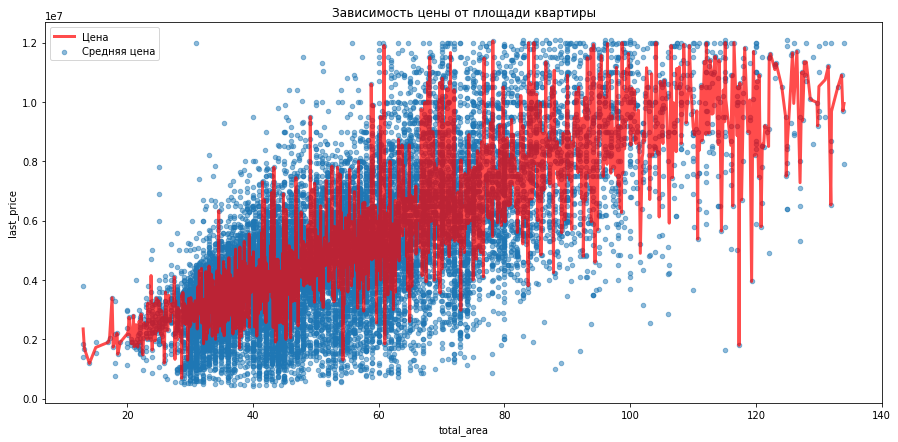

Коэффициент кореляции = 0.7048326959099623


In [25]:
corr_plot(df[['total_area', 'last_price']], 'Зависимость цены от площади квартиры' )


Зависимость цены от площади квартиры очевидна. Чем больше площадь, тем больше цена квартиры.

#### Зависимость цены от числа комнат.

Построим графики зависимости цены от числа комнат и расчитаем коэффициент кореляции.

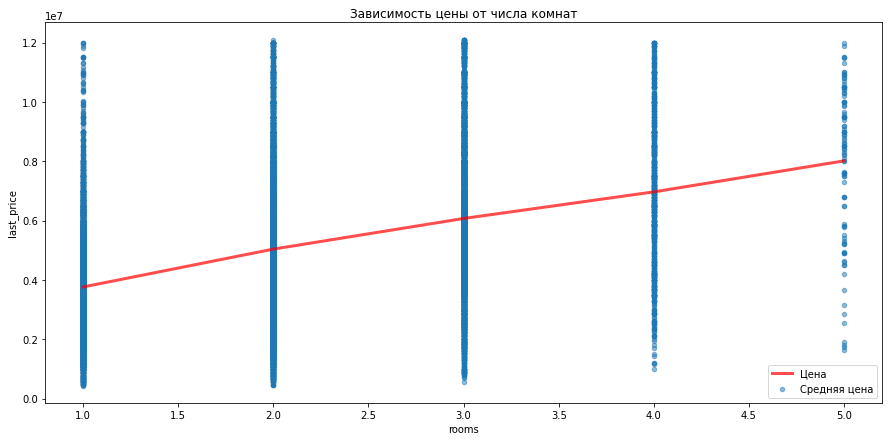

Коэффициент кореляции = 0.44202005199655414


In [26]:
corr_plot(df[['rooms', 'last_price']], 'Зависимость цены от числа комнат' )

Зависимость цены квартиры от количества комнат существует. Однако она не такая выраженная, как от площади квартиры. В общем случае, чем больше комнат, тем дороже кварира.

#### Зависимость цены от удалённости от центра.

Построим графики зависимости цены от удалённости от центра и расчитаем коэффициент кореляции.


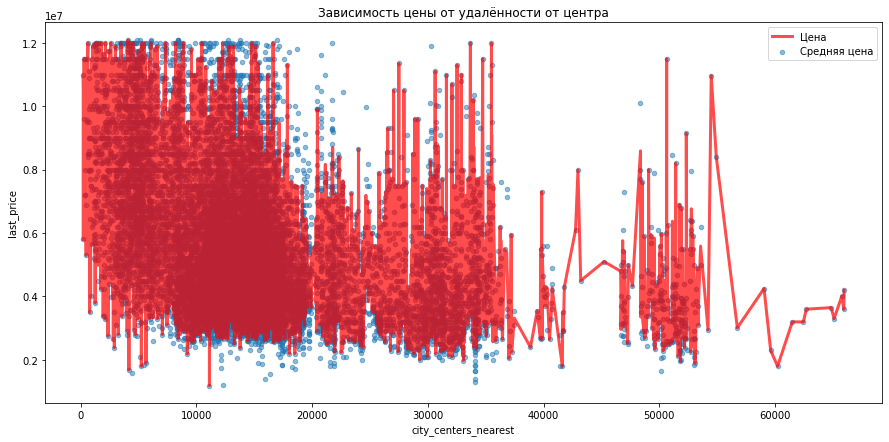

Коэффициент кореляции = -0.35460593712120136


In [27]:
corr_plot(df[['city_centers_nearest', 'last_price']], 'Зависимость цены от удалённости от центра' )

По графикам зависимость не очевидна, однако, на графике отчетливо видно, что большая часть дорогих квартир сконцентрирована на небольшом расстоянии от центра. Коэффициент кореляции также говорит, что чем дальше от центра, тем дешевле квартира. Зависимость, слабо выраженная. Думаю, другие факторы влияют на цену гораздо больше.

#### Зависимость цены от того, на каком этаже расположена квартира.

Рассчитаем среднюю и медианную цену квартиры для каждого типа этажа(первого, последнего, другого).

In [28]:
floor_pivot = df.pivot_table(index='floor_type', values='last_price', aggfunc=['mean', 'median'])
floor_pivot['percent'] = floor_pivot['median']['last_price'] / floor_pivot.loc['other', 'median']['last_price'] * 100
floor_pivot

,mean,median,percent
,last_price,last_price,
floor_type,,,
first,4.155568e+06,3850000,83.695652
last,4.514112e+06,4050000,88.043478
other,5.084652e+06,4600000,100.000000


Квартиры на первых и последних этажах стоят на 16% и 12% дешевле чем на других. 

#### Зависимость цены от даты размещения: дня недели, месяца и года  в центре Санкт-Петербурга.

Построим графики зависимости цены от дня недели, месяца и года и расчитаем коэффициент кореляции.

In [29]:
# Процедура выводит график зависимости по передаваемой таблице из 2-х колонок
def graf_plot(df_corr, title_name):
    x_col = df_corr.columns[0]
    # График средних значений
    (df_corr.pivot_table(index  =x_col, 
                         values ='last_price',
                         aggfunc='mean').
        plot(y        ='last_price',
             color    ='red',
             linewidth=3,
             alpha    =0.7,
             grid     =True,
             label    ='Средняя цена',
             title    =title_name,
             figsize  =(15,5)))

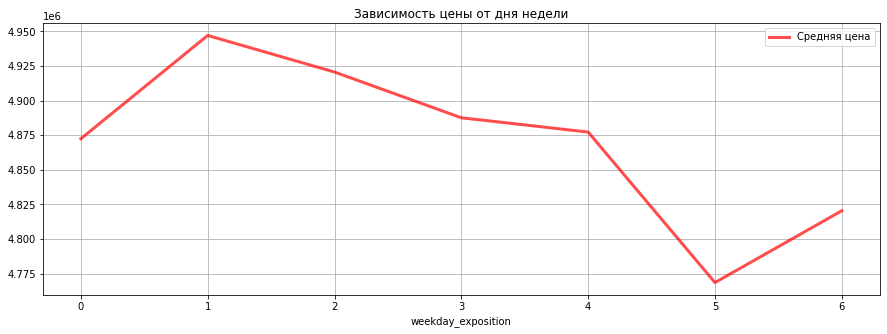

In [30]:
graf_plot(df[['weekday_exposition', 'last_price']], 'Зависимость цены от дня недели')

Похоже, что квартиры выставленные на продажу в начале недели продаются на 2-3% дороже, чем выставленные на продажу в конце недели.

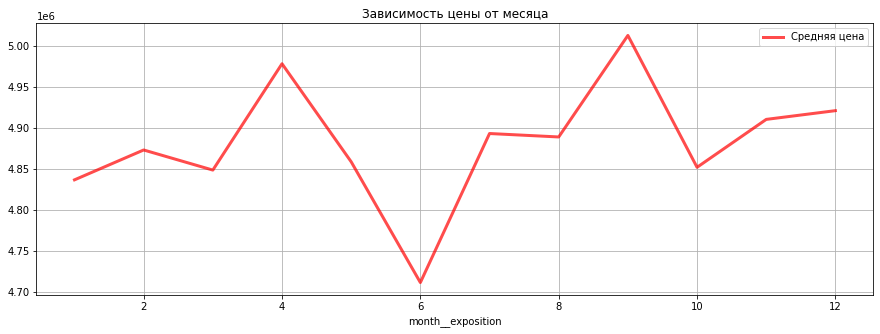

In [31]:
graf_plot(df[['month__exposition', 'last_price']], 'Зависимость цены от месяца')

Судя по графику, квартиры выставленные на продажу в апреле и сентябре продаются дороже всего. Самые дешевые квартиры выставляются в июне. Разница в средней цене между апрелем и июнем може составлять 300000 р.(5-6%)

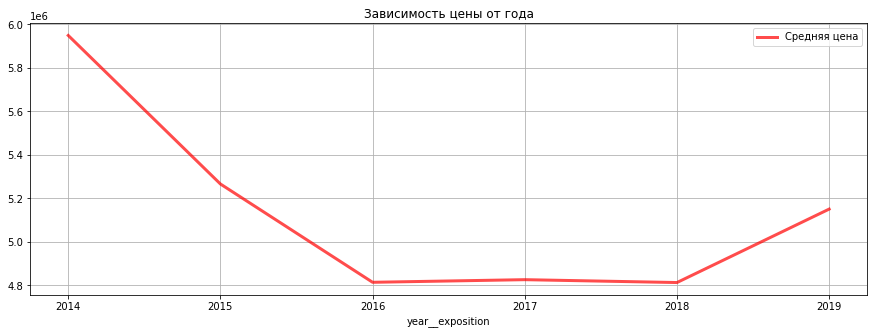

In [32]:
graf_plot(df[['year__exposition', 'last_price']], 'Зависимость цены от года')

Зависимость цены квартиры от года продажи обусловлена изменением рыночной цены. В 2014 и 2015 годах цена снижалась, 2016 и 2017 оставалась без существенных изменений, в 2018 году цены на квартиры росли.

**Вывод**

Цены на квартиры больше всего зависят от размера(площадь и количество комнат). Также, квартиры на первом и последнем этаже дешевле. Удалённость от центра влияет меньше. Дата размещения объявления о продаже, оказывает влияние на цену продажи. Квартиры выставленные на продажу в начале недели продаются на 2-3% дороже, чем выставленные на продажу в конце недели. Квартиры выставленные на продажу в апреле и сентябре продаются дороже всего. Самые дешевые квартиры выставляются в июне. Зависимость цены квартиры от года продажи обусловлена изменением рыночной цены.

### Изучение предложений квартир.

Выберим 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим населённые пункты с самой высокой и низкой стоимостью жилья.

In [33]:
# Города с наибольшим количеством объявлений
popular_loc = df['locality_name'].value_counts().head(10)
# Средняя стоимость квадратного метра в городах из сиска
(df.query('locality_name in @popular_loc.index').
    pivot_table(index  ='locality_name', 
                values ='price_square_meter', 
                aggfunc='mean').
     sort_values(by='price_square_meter', 
                 ascending=False).
     head(10))

,price_square_meter
locality_name,
Санкт-Петербург,105634.897142
Пушкин,100487.091795
деревня Кудрово,92229.151250
посёлок Парголово,90448.423806
посёлок Мурино,85031.776479
посёлок Шушары,78405.738420
Колпино,75185.478229
Гатчина,68664.035870
Всеволожск,67201.274152


**Вывод**

Населённые пункты с самой высокой стоимостью жилья: Санкт-Петербург, Пушкин, деревня Кудрово.
Населённые пункты с самой низкой стоимостью жилья: Выборг, Всеволожск, Гатчина.

### Изучение предложений квартир в центре Санкт-Петербурга.

Выделим квартиры в Санкт-Петербурге. Выяснм, какая область входит в центр. Для этого создадим столбец с расстоянием до центра в километрах. После этого посчитаем среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определим границу, где график сильно меняется, — это и будет центральная зона.

<AxesSubplot:title={'center':'Зависимость цены квартиры от расстояния до центра'}, xlabel='city_centers_km'>

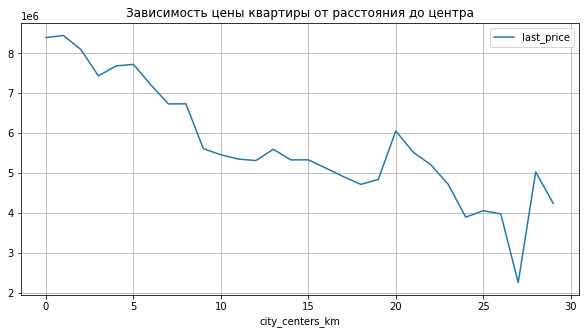

In [34]:
# Колонка с расстоянием до центра города в км.
df['city_centers_km'] = round(df['city_centers_nearest']/1000)
# График средней цены кв.м. для каждого километра
(df.query('locality_name == "Санкт-Петербург"').
 pivot_table(index  ='city_centers_km', 
             values ='last_price', 
             aggfunc='mean').
 plot(figsize=(10,5),
      grid   =True,
      title  ='Зависимость цены квартиры от расстояния до центра'))

**Вывод**

Центр города - в пределах 8 км.

### Анализ квартир в центре Санкт-Петербурга.

Выделим сегмент квартир в центре. Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков. Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).

In [35]:
df_centr = df.query('locality_name == "Санкт-Петербург" and city_centers_km <= 8')


In [36]:
print('Квартиры в центре')
display(df_centr[['total_area', 'last_price', 'rooms', 'ceiling_height']].apply([min, max, np.mean, np.median]))
print('Все квартиры')
df[['total_area', 'last_price', 'rooms', 'ceiling_height']].apply([min, max, np.mean, np.median])

Квартиры в центре


,total_area,last_price,rooms,ceiling_height
min,13.000000,1.600000e+06,1.0,2.400000
max,134.000000,1.210000e+07,5.0,3.520000
mean,65.456769,7.398951e+06,2.3,2.938444
median,63.100000,7.290000e+06,2.0,3.000000


Все квартиры


,total_area,last_price,rooms,ceiling_height
min,13.000000,4.400000e+05,1.000000,2.200000
max,134.000000,1.210000e+07,5.000000,3.520000
mean,53.472311,4.884884e+06,1.945341,2.677079
median,50.000000,4.450000e+06,2.000000,2.600000


**Вывод**

Отличия квартир в центре от всех квартир:
- Средняя площать в центре выше на 10 кв.м.
- Цены в центре выше на 2 миллиона.
- Количество комнат не отличается( в среднем 2)
- Высота потолков в центре больше.

#### Зависимость цены от площади квартиры в центре Санкт-Петербурга.

Построим графики зависимости цены от площади квартиры и расчитаем коэффициент кореляции.

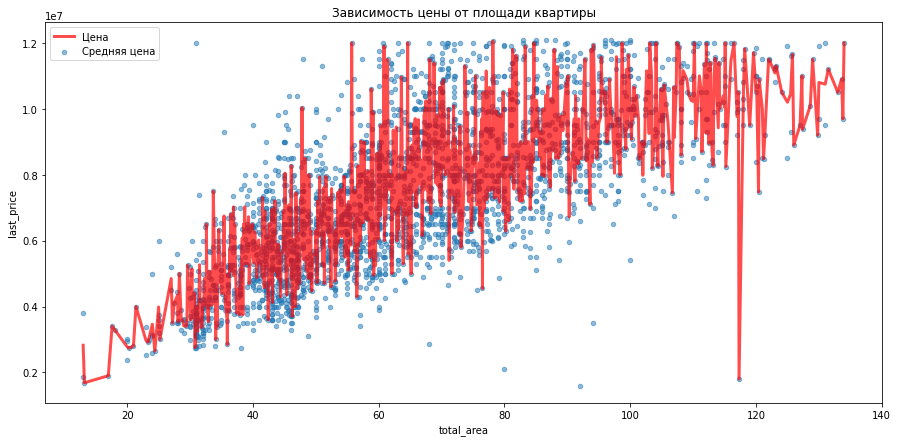

Коэффициент кореляции = 0.715212105484405


In [37]:
corr_plot(df_centr[['total_area', 'last_price']], 'Зависимость цены от площади квартиры' )

#### Зависимость цены от числа комнат квартиры в центре Санкт-Петербурга.

Построим графики зависимости цены от числа комнат и расчитаем коэффициент кореляции.

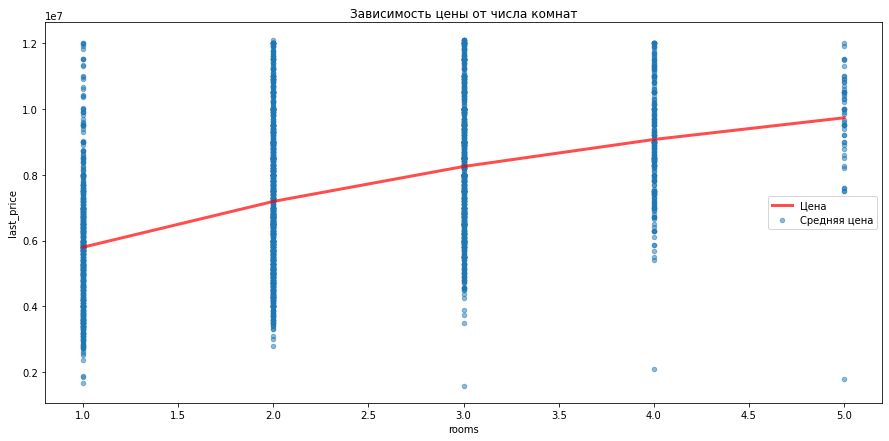

Коэффициент кореляции = 0.4672082712893873


In [38]:
corr_plot(df_centr[['rooms', 'last_price']], 'Зависимость цены от числа комнат' )

#### Зависимость цены от того, на каком этаже расположена квартира  в центре Санкт-Петербурга.

Рассчитаем среднюю и медианную цену квартиры для каждого типа этажа(первого, последнего, другого).

In [39]:
floor_pivot = df_centr.pivot_table(index='floor_type', values='last_price', aggfunc=['mean', 'median'])
floor_pivot['percent'] = floor_pivot['median']['last_price'] / floor_pivot.loc['other', 'median']['last_price'] * 100
floor_pivot

,mean,median,percent
,last_price,last_price,
floor_type,,,
first,6.338666e+06,5985000,79.800000
last,7.420562e+06,7300000,97.333333
other,7.595596e+06,7500000,100.000000


Первые этажи и в центре города дешевле остальных на 16%. А последние, в отличии от их стоимости в целом по городу, лишь на 2% дешевле чем другие этажи. 

####  Зависимость цены от удалённости от центра квартиры в центральном районе Санкт-Петербурга.

Рассчитаем среднюю и медианную цену квартиры для каждого типа этажа(первого, последнего, другого).

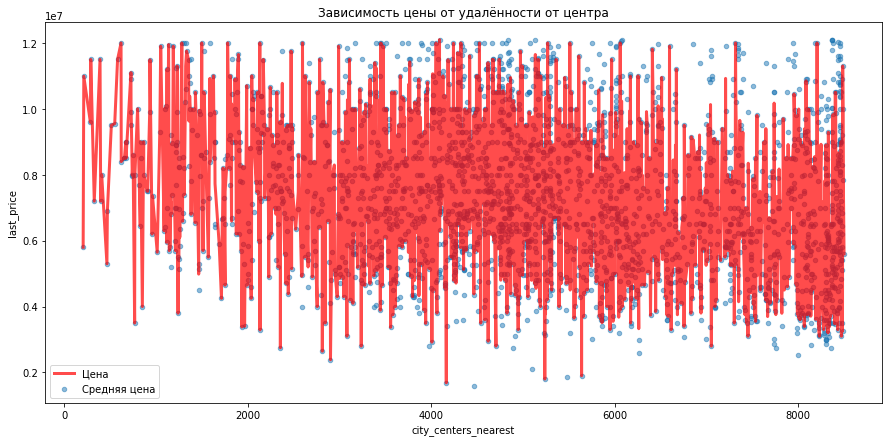

Коэффициент кореляции = -0.19250376410355122


In [40]:
corr_plot(df_centr[['city_centers_nearest', 'last_price']], 'Зависимость цены от удалённости от центра' )

#### Зависимость цены от даты размещения: дня недели, месяца и года в центре Санкт-Петербурга.

Построим графики зависимости цены от дня недели, месяца и года и расчитаем коэффициент кореляции.

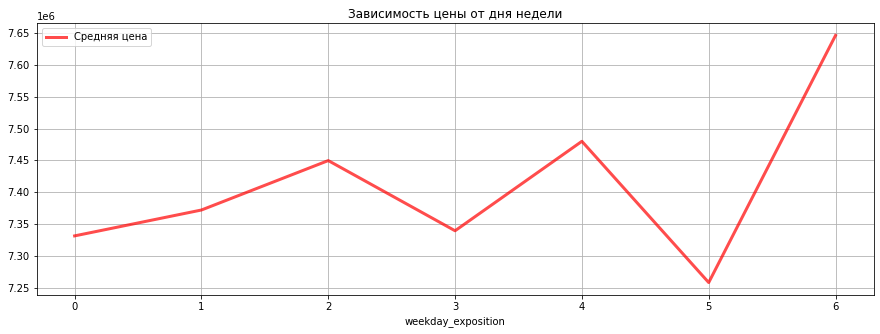

In [41]:
graf_plot(df_centr[['weekday_exposition', 'last_price']], 'Зависимость цены от дня недели')

В центре Санкт-Петербурга, зависимость цены квартиры от дня недели имеет место быть. Квартиры выставленные на продажу в воскресенье продаются на 3-4% дороже, чем выставленные на продажу в субботу.

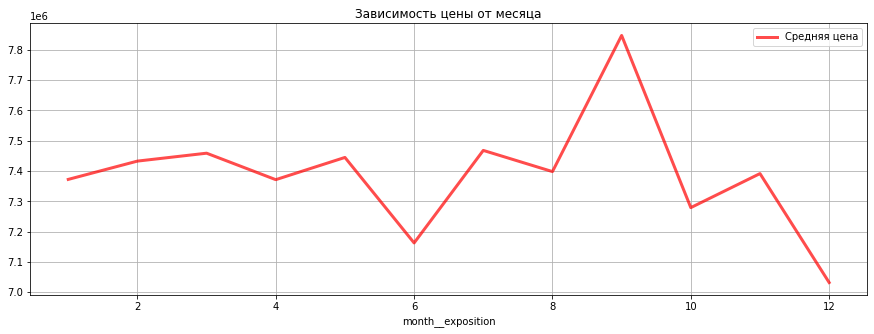

In [42]:
graf_plot(df_centr[['month__exposition', 'last_price']], 'Зависимость цены от месяца')

Квартиры выставленные на продажу в сентябре продаются дороже всего. Самые дешевые квартиры выставляются в декабре и июне. Разница в средней цене между сентябрём и декабрём составляет 800000 р.(9%)

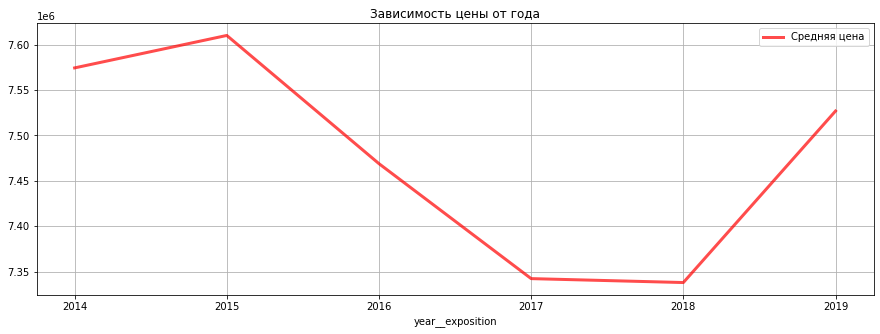

In [43]:
graf_plot(df_centr[['year__exposition', 'last_price']], 'Зависимость цены от года')

Зависимость цены квартиры от года продажи обусловлена изменением рыночной цены. В 2015 и 2016 годах цена снижалась, 2017 оставалась без существенных изменений, в 2018 году цены на квартиры росли.

**Вывод**

- Цены на квартиры в центре Санкт-Петербурга, также как и остальные предложения, больше всего зависят от размера(площадь и количество комнат).
- Удалённость от центра, также, влияет на цену - чем дальше от Дворцовой площади - тем меньше цена. - - Квартиры на первом этаже во всех районах города дешевле на 16%.  
- В отличии от остальных квартир, квартиры в центре на последнем этаже не существенно дешевле квартир на остальных этажах.
- Зависимость цены квартир в центре от даты размещения, в целом, имеет схожий характер с остальными предложениями на рынке жилья. От дня недели и месяца, цены квартир в центре зависят в большей степени чем во всём городе. Дни недели максимума и минимума цены отличаются: воскресенье и суббота. Распределение цены в центре по месяцам схоже с остальным городом. Отличие в месяце минимальной цены - декабрь.

## Общий вывод

На этапе первичного анализа данных были выявлены пропуски, проблемы с типами данных и некоторые неправдоподобные данные. 
На этапе предобработки часть проблем удалось решить: избавились от некоторых пропусков, преобразовали типы данных, где это было возможно.
Далее, были произведены расчёты необходимых показателей и добавлены в датафрейм.
Затем, были изучены редкие и выбивающиеся значения.
Изучены факторы, больше всего влияющие на цену квартиры в целом в Санкт-Петербурге и в его центре.

Факторы, влияющие на цену квартиры в центре и в других районах:
- Площадь: чем больше, тем дороже;
- Количество комнат:  чем больше, тем дороже;
- Удалённость от центра:  чем дальше от центра, тем дешевле;
- Первый этаж: дешевле остальных.
- Год размещения обьявления: зависит от рыночной цены.
- Месяц размещения обьявления: характер зависимости схож, кроме декабря. 

Отличия в факторах, влияющих на цену квартиры в центре и в других районах:
- Последний этаж в центре стоит почти столькоже как остальные, в остальных районах - дешевле.
- День недели размещения: распределение цены квартиры по дням неделе совсем другое.
